# NATURAL LANGUAGE PROCESS==NLP
Temel olarak, bilgisayarların insan dilini anlamasını, yorumlamasını, üretmesini ve cevaplamasını sağlamak için tasarlanmıştır.

NLP'nin ana hedefleri şunlardır:

Metin Anlama: Bilgisayarların yazılı metinleri anlamalarını sağlamak. Bu, dilbilgisi, semantik ve pragmatik gibi dilbilim konularını içerir.

Konuşma Tanıma: Bilgisayarların konuşmayı anlamalarını sağlamak. Bu, ses dosyalarını metne dönüştürme ve konuşulanı anlama süreçlerini içerir.

Metin Üretme: Bilgisayarların dilbilgisine uygun metinler oluşturmasını sağlamak.

Çeviri: Bilgisayarların bir dili diğerine çevirmelerini sağlamak.

Duygu Analizi: Metinlerdeki duygusal tonları anlamak ve sınıflandırmak.

Bilgi Çıkarma: Metinlerden bilgi çıkarmak, örneğin belirli konulardaki önemli bilgileri belirlemek.
## Kütüphane
* nltk

# ** DATASET**
https://www.kaggle.com/datasets/crowdflower/twitter-user-gender-classification

In [178]:
import pandas as pd
df=pd.read_csv(r"tw.csv",encoding="latin1")
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [179]:
df=pd.concat([df["gender"],df["description"]],axis=1)
df.dropna(inplace=True,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16224 entries, 0 to 20049
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       16224 non-null  object
 1   description  16224 non-null  object
dtypes: object(2)
memory usage: 380.2+ KB


In [180]:
df["gender"]=[1 if i=="female" else 0 for i in df["gender"]]
df.head()

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
2,0,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


## Data Cleaning and Preperation
regular expression(RE)  "[^a-zA-z]"

In [181]:
import re
first_description=df["description"][4]
print(first_description)
description=re.sub("[^a-zA-z]"," ",first_description)#a z ye olanları seçme. ^- -> seçme demek.a dan z ye kadar olmayanları boşlukla değiştir
description=description.lower()
print(description)

Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx
ricky wilson the best frontman kaiser chiefs the best band xxxx thank you kaiser chiefs for an incredible year of gigs and memories to cherish always    xxxxxxx


## Irrelevant Words(Stopwords)

In [182]:
#ırrelevant words=gereksiz kelimeler(the,and,as vs..)
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

description=nltk.word_tokenize(description)
description=[i for i in description if not i in set(stopwords.words("english"))]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [183]:
print(description)

['ricky', 'wilson', 'best', 'frontman', 'kaiser', 'chiefs', 'best', 'band', 'xxxx', 'thank', 'kaiser', 'chiefs', 'incredible', 'year', 'gigs', 'memories', 'cherish', 'always', 'xxxxxxx']


## Lemmatization
* Bu metodolojinin anahtarı dilbilimidir.Doğru lemma’yı açığa çıkarmak için her kelimenin morfolojik analizine bakmak gerekir.Bu, böyle bir analiz sağlanacak her dil için sözlüklere sahip olunması gerektiğini ele alır.

In [184]:
nltk.download('wordnet')
lemma=nltk.WordNetLemmatizer()
description=[lemma.lemmatize(i) for i in description ]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [185]:
print(description)  #kelime köklerini bulduk

['ricky', 'wilson', 'best', 'frontman', 'kaiser', 'chief', 'best', 'band', 'xxxx', 'thank', 'kaiser', 'chief', 'incredible', 'year', 'gig', 'memory', 'cherish', 'always', 'xxxxxxx']


In [186]:
description=" ".join(description)
print(description)#kelimenin kökleriyle cümle oluşturduk."memories " , "memory" oldu cümlede

ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx


* Df mizin description sutununun 4.verisi yerine tüm satırlara bu işlemleri uygulayacağız aynı sutunda


In [187]:
description_list=[]
import re
for description in df["description"]:
  description=re.sub("[^a-zA-z]"," ",description)#a z ye olanları seçme. ^- -> seçme demek.a dan z ye kadar olmayanları boşlukla değiştir
  description=description.lower()

  description=nltk.word_tokenize(description)
  description=[i for i in description if not i in set(stopwords.words("english"))]


  lemma=nltk.WordNetLemmatizer()
  description=[lemma.lemmatize(i) for i in description ]

  description=" ".join(description)
  description_list.append(description)



In [188]:
description_list[0:50]

['sing rhythm',
 'author novel filled family drama romance',
 'louis whining squealing',
 'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer',
 'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx',
 'know',
 'global marketplace image video music sharing photo inspiration design tip video creative community',
 'secret getting ahead getting started',
 'pll fan crazy mcd ramen bae',
 'renaissance art historian university nottingham fuelled haribo partial coffee soft spot renaissance china national teaching fellow',
 'clean food taste great providing energy nutrient guilt granola vegan paleo friendly option cert organic gf kosher',
 'highly extraordinary auction',
 'senior xi xii mmxiv',
 'come join fastest blog network online today http co mfpa vgk http co mpuuqtyf g cover credit repair credit card bankruptcy',
 'im p bo burnham disney world',
 

## Bag of Words

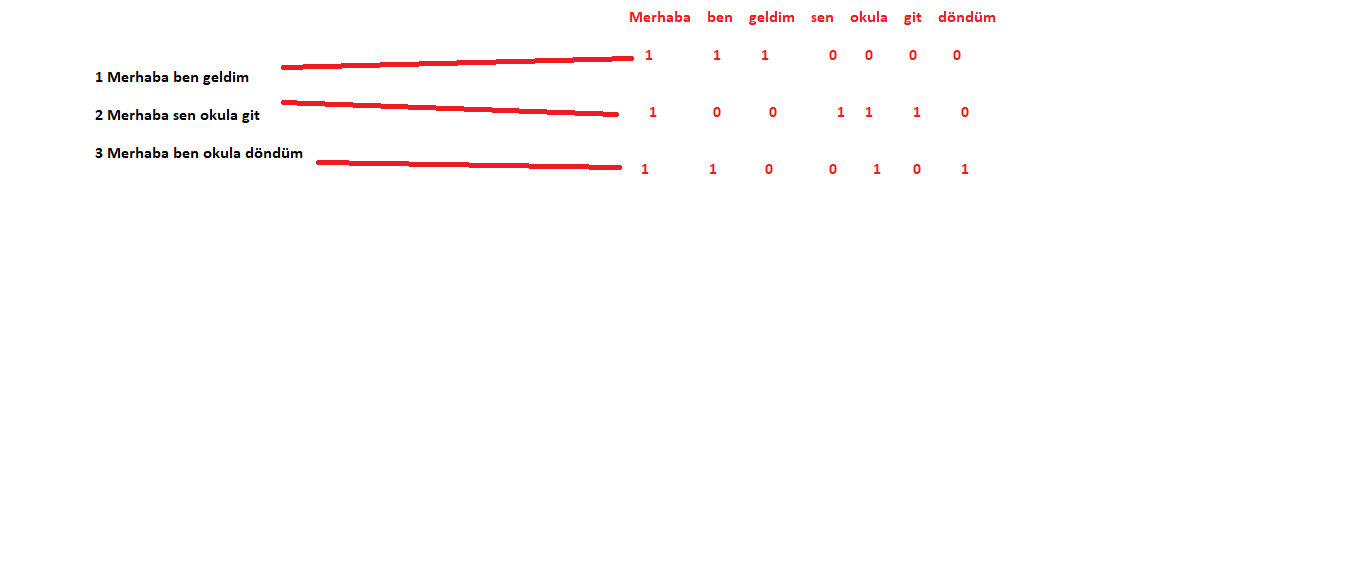

In [205]:
from sklearn.feature_extraction.text import CountVectorizer #bow yaratmak için method
max_features=1500 #en çok kullanılan 1500 kelime seç

count_vectorizer=CountVectorizer(max_features=max_features,stop_words="english")

sparse_matrix=count_vectorizer.fit_transform(description_list).toarray() #X


print(f"en cok kullanilan {max_features} kelimeler : {count_vectorizer.get_feature_names_out()}")


en cok kullanilan 1500 kelimeler : ['__' '___' '_n' ... 'youtuber' 'yr' 'zayn']


## Machine Learning Modelini Kurma

In [206]:
X=sparse_matrix
y=df.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5816389402341343
